## SARSA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from env_simulator import ToyEnv

In [2]:
env = ToyEnv()

In [3]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
n_episodes = 2000
gamma = 0.98
epsilon = 1
max_steps_per_ep = 100
learning_rate = 0.5

In [4]:
Q = np.zeros([n_states, n_actions])

In [5]:
def choose_action(s):
    prob = [float(epsilon)/n_actions]*n_actions
    prob[np.argmax(Q[s,:])] += 1-epsilon
    a = np.random.choice(n_actions,1,p=prob)
    return a[0]

In [6]:
rewards = [] # To hold total reward per episode
avg_rewards = [] # To hold running average of rewards per episode
for ep in range(n_episodes):
    s,r,done = env.reset()
    a = choose_action(s)
    n_step = 0
    ep_r = 0
    epsilon = 1.0/(ep+1)
    while not done:
        s1,r,done = env.step(a)
        a1 = choose_action(s1)
        Q[s,a] += learning_rate*(r + gamma*Q[s1,a1] - Q[s,a])
        s = s1
        a = a1
        ep_r += r
        n_step += 1
        if n_step > max_steps_per_ep:
            break
    rewards.append(ep_r)
    avg_rewards.append(sum(rewards[-500:])/500.0)
    if not ep % 100:
        print("Episode #%d : Reward = %f, Avg Rew = %f" % (ep, ep_r, avg_rewards[-1]))    

Episode #0 : Reward = -1.000000, Avg Rew = -0.002000
Episode #100 : Reward = -1.000000, Avg Rew = 0.014000
Episode #200 : Reward = -1.000000, Avg Rew = 0.090000
Episode #300 : Reward = 1.000000, Avg Rew = 0.178000
Episode #400 : Reward = -1.000000, Avg Rew = 0.262000
Episode #500 : Reward = 1.000000, Avg Rew = 0.372000
Episode #600 : Reward = 1.000000, Avg Rew = 0.432000
Episode #700 : Reward = -1.000000, Avg Rew = 0.428000
Episode #800 : Reward = 1.000000, Avg Rew = 0.392000
Episode #900 : Reward = 1.000000, Avg Rew = 0.372000
Episode #1000 : Reward = 1.000000, Avg Rew = 0.304000
Episode #1100 : Reward = 1.000000, Avg Rew = 0.272000
Episode #1200 : Reward = 1.000000, Avg Rew = 0.280000
Episode #1300 : Reward = -1.000000, Avg Rew = 0.300000
Episode #1400 : Reward = 1.000000, Avg Rew = 0.324000
Episode #1500 : Reward = -1.000000, Avg Rew = 0.336000
Episode #1600 : Reward = 1.000000, Avg Rew = 0.356000
Episode #1700 : Reward = 1.000000, Avg Rew = 0.336000
Episode #1800 : Reward = 1.00000

Q Values Learned [[-17.28337203 -29.59213425  15.07831353 -29.28484296]
 [-31.14499487 -30.31868687  17.34639654 -30.59258556]
 [-29.9864543  -30.81309299 -30.67745945  23.7560085 ]
 [-40.12308933 -40.16064255 -40.2100834  -40.22161062]
 [ 49.99988166   2.16439898   0.          11.07327959]]


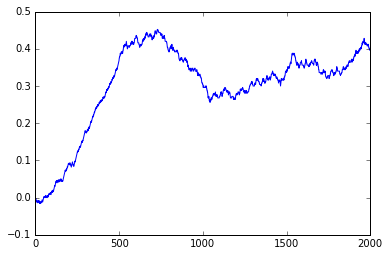

In [9]:
print "Q Values Learned", Q
plt.plot(avg_rewards)